<a href="https://colab.research.google.com/github/phajavi/404-error/blob/main/mnist_KNN_LOGISTIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import  train_test_split
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


In [95]:
test_df = pd.read_csv("sample_data/mnist_test.csv")
train_df = pd.read_csv("sample_data/mnist_train.csv")




In [96]:
train_df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [97]:
test_df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [98]:
train_df.shape

(60000, 785)

In [99]:
y=train_df['label']
x=train_df.drop('label',axis=1)

In [100]:
x_for_test_data=test_df[:]

2


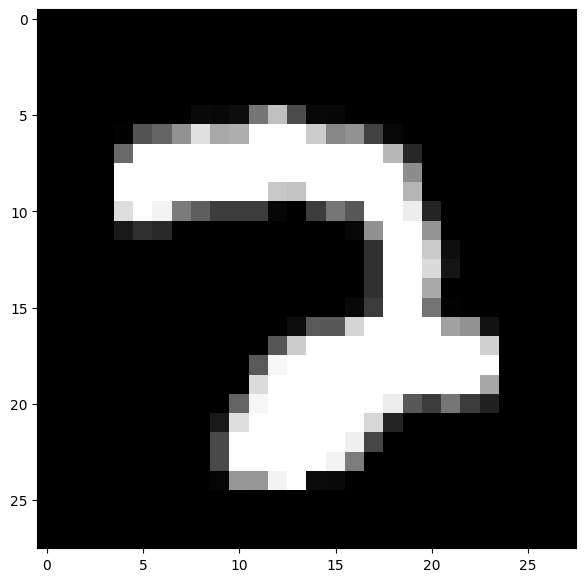

In [101]:
plt.figure(figsize=(7,7))
some_digit=120
some_digit_image = x.iloc[some_digit].to_numpy().reshape(28, 28)
plt.imshow(np.reshape(some_digit_image, (28,28)), cmap=plt.cm.gray)
print(y[some_digit])

In [102]:
from sklearn.model_selection import  train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)



In [103]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((48000, 784), (48000,), (12000, 784), (12000,))

In [104]:
from sklearn.preprocessing import  StandardScaler
scaler = StandardScaler()
scaler.fit(x_train,y_train)
x_train = scaler.transform(x_train)
x_train.shape

(48000, 784)

In [105]:
# k =5
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [106]:
y_prediction = classifier.predict(x_test)
y_prediction

array([9, 3, 8, ..., 9, 9, 2])

In [107]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(y_test, y_prediction))
print(classification_report(y_test, y_prediction))
print(confusion_matrix(y_test, y_prediction))

0.7955
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1175
           1       0.91      0.98      0.94      1322
           2       0.93      0.62      0.74      1174
           3       0.84      0.88      0.86      1219
           4       0.81      0.83      0.82      1176
           5       0.86      0.63      0.73      1104
           6       0.99      0.76      0.86      1177
           7       0.92      0.52      0.67      1299
           8       0.60      0.96      0.74      1160
           9       0.59      0.90      0.72      1194

    accuracy                           0.80     12000
   macro avg       0.83      0.79      0.79     12000
weighted avg       0.83      0.80      0.79     12000

[[1011    1   14   40   17   53    1    3   33    2]
 [   0 1292    3    3    1    0    0    0   21    2]
 [  33   45  730   53   40    0    5   35  207   26]
 [  11    5    3 1071    2   25    0    3   73   26]
 [   7    3    4    2 

In [108]:
y_prediction_on_test_data = classifier.predict(x_for_test_data.iloc[:, :-1])
y_prediction_on_test_data

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


array([7, 2, 1, ..., 4, 8, 6])

In [109]:
# k =23
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 23)
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=23)

In [110]:
y_prediction = classifier.predict(x_test)
y_prediction

array([9, 3, 8, ..., 9, 9, 2])

In [111]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(y_test, y_prediction))
print(classification_report(y_test, y_prediction))
print(confusion_matrix(y_test, y_prediction))

0.7623333333333333
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1175
           1       0.90      0.98      0.93      1322
           2       0.95      0.52      0.67      1174
           3       0.86      0.86      0.86      1219
           4       0.80      0.83      0.82      1176
           5       0.89      0.53      0.66      1104
           6       0.99      0.74      0.85      1177
           7       0.95      0.41      0.57      1299
           8       0.51      0.97      0.67      1160
           9       0.55      0.92      0.69      1194

    accuracy                           0.76     12000
   macro avg       0.82      0.76      0.76     12000
weighted avg       0.83      0.76      0.76     12000

[[1019    0    8   31   12   45    0    1   54    5]
 [   0 1289    1    6    1    0    0    0   24    1]
 [  43   52  613   52   45    1    3   20  318   27]
 [  13    6    1 1044    3   18    1    2  107   24]
 [   5    

In [112]:
# k =10
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 10)
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [113]:
y_prediction = classifier.predict(x_test)
y_prediction

array([9, 3, 8, ..., 9, 9, 2])

In [114]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(y_test, y_prediction))
print(classification_report(y_test, y_prediction))
print(confusion_matrix(y_test, y_prediction))

0.7864166666666667
              precision    recall  f1-score   support

           0       0.85      0.86      0.86      1175
           1       0.91      0.98      0.94      1322
           2       0.94      0.58      0.72      1174
           3       0.85      0.88      0.86      1219
           4       0.82      0.86      0.84      1176
           5       0.87      0.58      0.70      1104
           6       0.99      0.75      0.85      1177
           7       0.93      0.50      0.65      1299
           8       0.56      0.97      0.71      1160
           9       0.58      0.91      0.71      1194

    accuracy                           0.79     12000
   macro avg       0.83      0.79      0.78     12000
weighted avg       0.83      0.79      0.78     12000

[[1011    1   10   35    9   54    1    3   47    4]
 [   0 1291    3    4    1    0    0    0   22    1]
 [  36   43  681   53   38    0    5   34  250   34]
 [  11    6    1 1070    2   20    1    2   83   23]
 [   9    

In [115]:
# k =5
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [116]:
y_prediction = classifier.predict(x_test)
y_prediction

array([9, 3, 8, ..., 9, 9, 2])

In [117]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(y_test, y_prediction))
print(classification_report(y_test, y_prediction))
print(confusion_matrix(y_test, y_prediction))

0.7955
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1175
           1       0.91      0.98      0.94      1322
           2       0.93      0.62      0.74      1174
           3       0.84      0.88      0.86      1219
           4       0.81      0.83      0.82      1176
           5       0.86      0.63      0.73      1104
           6       0.99      0.76      0.86      1177
           7       0.92      0.52      0.67      1299
           8       0.60      0.96      0.74      1160
           9       0.59      0.90      0.72      1194

    accuracy                           0.80     12000
   macro avg       0.83      0.79      0.79     12000
weighted avg       0.83      0.80      0.79     12000

[[1011    1   14   40   17   53    1    3   33    2]
 [   0 1292    3    3    1    0    0    0   21    2]
 [  33   45  730   53   40    0    5   35  207   26]
 [  11    5    3 1071    2   25    0    3   73   26]
 [   7    3    4    2 

In [118]:
# k =3
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3)
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [119]:
y_prediction = classifier.predict(x_test)
y_prediction

array([9, 3, 8, ..., 9, 9, 2])

In [120]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(y_test, y_prediction))
print(classification_report(y_test, y_prediction))
print(confusion_matrix(y_test, y_prediction))

0.78875
              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1175
           1       0.90      0.97      0.94      1322
           2       0.91      0.63      0.74      1174
           3       0.81      0.88      0.84      1219
           4       0.80      0.81      0.81      1176
           5       0.85      0.64      0.73      1104
           6       0.99      0.73      0.84      1177
           7       0.92      0.52      0.66      1299
           8       0.62      0.95      0.75      1160
           9       0.59      0.89      0.71      1194

    accuracy                           0.79     12000
   macro avg       0.82      0.79      0.79     12000
weighted avg       0.82      0.79      0.79     12000

[[1013    3   23   42   16   49    1    3   22    3]
 [   1 1288    4    2    2    0    0    0   23    2]
 [  47   41  739   58   32    0    0   35  193   29]
 [  13    9    4 1068    4   27    1    6   65   22]
 [   4    4    3    8

In [121]:
# k =100
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 100)
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=100)

In [122]:
y_prediction = classifier.predict(x_test)
y_prediction

array([9, 3, 8, ..., 9, 9, 2])

In [123]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(y_test, y_prediction))
print(classification_report(y_test, y_prediction))
print(confusion_matrix(y_test, y_prediction))

0.7014166666666667
              precision    recall  f1-score   support

           0       0.83      0.86      0.85      1175
           1       0.85      0.98      0.91      1322
           2       0.97      0.36      0.52      1174
           3       0.87      0.79      0.83      1219
           4       0.78      0.79      0.78      1176
           5       0.89      0.38      0.54      1104
           6       0.99      0.69      0.81      1177
           7       0.95      0.26      0.41      1299
           8       0.42      0.97      0.59      1160
           9       0.50      0.92      0.64      1194

    accuracy                           0.70     12000
   macro avg       0.81      0.70      0.69     12000
weighted avg       0.81      0.70      0.69     12000

[[1012    0    1   22    8   32    0    0   92    8]
 [   0 1290    1    6    2    0    0    0   23    0]
 [  61   88  420   47   49    1    4   11  466   27]
 [  15   10    0  963    3   12    0    2  193   21]
 [   6   1

In [124]:
# k =7
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 7)
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [125]:
y_prediction = classifier.predict(x_test)
y_prediction

array([9, 3, 8, ..., 9, 9, 2])

In [126]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(y_test, y_prediction))
print(classification_report(y_test, y_prediction))
print(confusion_matrix(y_test, y_prediction))

0.7903333333333333
              precision    recall  f1-score   support

           0       0.85      0.86      0.86      1175
           1       0.91      0.98      0.94      1322
           2       0.93      0.60      0.73      1174
           3       0.85      0.88      0.86      1219
           4       0.82      0.84      0.83      1176
           5       0.87      0.61      0.72      1104
           6       0.99      0.76      0.86      1177
           7       0.93      0.50      0.65      1299
           8       0.58      0.97      0.73      1160
           9       0.58      0.90      0.71      1194

    accuracy                           0.79     12000
   macro avg       0.83      0.79      0.79     12000
weighted avg       0.83      0.79      0.79     12000

[[1016    1   11   39   14   52    1    3   35    3]
 [   0 1291    4    4    1    0    0    0   21    1]
 [  35   46  704   47   42    0    4   33  233   30]
 [  13    5    1 1069    2   23    1    3   77   25]
 [   7    

logistic regression

In [127]:
from sklearn.linear_model import LogisticRegression
log_classifier = LogisticRegression(random_state=1000,max_iter=10)
log_classifier.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=10, random_state=1000)

In [128]:
y_prediction_log=log_classifier.predict(x_test)

In [129]:
y_prediction_log

array([7, 3, 8, ..., 9, 9, 2])

In [130]:
print(accuracy_score(y_test, y_prediction_log))
print(classification_report(y_test, y_prediction_log))
print(confusion_matrix(y_test, y_prediction_log))

0.7105
              precision    recall  f1-score   support

           0       0.97      0.92      0.94      1175
           1       0.97      0.41      0.57      1322
           2       0.95      0.76      0.84      1174
           3       0.89      0.78      0.83      1219
           4       0.94      0.73      0.82      1176
           5       0.93      0.14      0.25      1104
           6       0.96      0.87      0.92      1177
           7       0.97      0.72      0.82      1299
           8       0.29      0.99      0.45      1160
           9       0.75      0.80      0.77      1194

    accuracy                           0.71     12000
   macro avg       0.86      0.71      0.72     12000
weighted avg       0.86      0.71      0.72     12000

[[1076    0    4    4    6    3    9    3   65    5]
 [   0  538    3    9    0    0    1    0  768    3]
 [   3    6  891   25    8    0   14    8  212    7]
 [   4    1   11  948    1    2    1    3  238   10]
 [   1    0    5    2 

In [131]:
from sklearn.linear_model import LogisticRegression
log_classifier = LogisticRegression(random_state=1000,max_iter=5)
log_classifier.fit(x_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=5, random_state=1000)

In [132]:
y_prediction_log=log_classifier.predict(x_test)

In [133]:
print(accuracy_score(y_test, y_prediction_log))
print(classification_report(y_test, y_prediction_log))
print(confusion_matrix(y_test, y_prediction_log))

0.6426666666666667
              precision    recall  f1-score   support

           0       0.95      0.88      0.91      1175
           1       1.00      0.13      0.23      1322
           2       0.91      0.71      0.80      1174
           3       0.85      0.78      0.81      1219
           4       0.93      0.73      0.82      1176
           5       0.96      0.06      0.12      1104
           6       0.95      0.74      0.84      1177
           7       0.98      0.66      0.79      1299
           8       0.24      0.99      0.39      1160
           9       0.76      0.76      0.76      1194

    accuracy                           0.64     12000
   macro avg       0.85      0.65      0.65     12000
weighted avg       0.86      0.64      0.65     12000

[[1036    0    5    4    4    1    9    1  113    2]
 [   0  175    7    7    0    0    2    0 1129    2]
 [   2    0  837   26    5    0   15    7  276    6]
 [   5    0   15  947    1    1    2    3  238    7]
 [   1    

In [134]:
from sklearn.linear_model import LogisticRegression
log_classifier = LogisticRegression(random_state=1000,max_iter=7)
log_classifier.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=7, random_state=1000)

In [135]:
y_prediction_log=log_classifier.predict(x_test)

In [136]:
print(accuracy_score(y_test, y_prediction_log))
print(classification_report(y_test, y_prediction_log))
print(confusion_matrix(y_test, y_prediction_log))

0.6968333333333333
              precision    recall  f1-score   support

           0       0.96      0.88      0.92      1175
           1       0.98      0.30      0.46      1322
           2       0.92      0.74      0.82      1174
           3       0.88      0.78      0.83      1219
           4       0.91      0.80      0.85      1176
           5       0.94      0.16      0.27      1104
           6       0.96      0.81      0.88      1177
           7       0.97      0.75      0.84      1299
           8       0.27      0.99      0.43      1160
           9       0.83      0.78      0.80      1194

    accuracy                           0.70     12000
   macro avg       0.86      0.70      0.71     12000
weighted avg       0.87      0.70      0.71     12000

[[1031    0    4    5    6    5   10    2  110    2]
 [   0  399    7    7    0    0    1    0  906    2]
 [   2    3  864   28    9    0   12   10  240    6]
 [   3    0   20  951    1    1    1    3  230    9]
 [   1    

In [137]:
from sklearn.linear_model import LogisticRegression
log_classifier = LogisticRegression(random_state=1000,max_iter=19)
log_classifier.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=19, random_state=1000)

In [138]:
y_prediction_log=log_classifier.predict(x_test)

In [139]:
print(accuracy_score(y_test, y_prediction_log))
print(classification_report(y_test, y_prediction_log))
print(confusion_matrix(y_test, y_prediction_log))

0.6481666666666667
              precision    recall  f1-score   support

           0       0.98      0.88      0.93      1175
           1       0.96      0.05      0.10      1322
           2       0.93      0.74      0.82      1174
           3       0.86      0.79      0.82      1219
           4       0.94      0.67      0.79      1176
           5       0.92      0.12      0.22      1104
           6       0.98      0.81      0.89      1177
           7       0.98      0.68      0.80      1299
           8       0.25      0.99      0.39      1160
           9       0.74      0.77      0.76      1194

    accuracy                           0.65     12000
   macro avg       0.85      0.65      0.65     12000
weighted avg       0.86      0.65      0.65     12000

[[1033    0    5    7    4    6    5    4  107    4]
 [   0   69    4   21    0    0    0    0 1226    2]
 [   2    1  869   25    6    0    8    2  254    7]
 [   1    0   11  968    0    1    0    3  232    3]
 [   1    